## Optimisation des hyperparamètres

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])

param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__kernel": ["linear", "rbf", "poly"],
    "svm__gamma": ["scale", "auto", 0.01, 0.1],
}

grid = GridSearchCV(
    pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1, return_train_score=True
)

grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto', 0.01, 0.1],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [4]:
print(f"Meilleurs parametres : {grid.best_params_}")
print(f"Meilleur score CV : {grid.best_score_}")

Meilleurs parametres : {'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Meilleur score CV : 0.9802197802197803


In [5]:
nb_combi = 1

for values in param_grid.values():
    nb_combi *= len(values)

print(f"Nombre de combinaisons : {nb_combi}")

Nombre de combinaisons : 48


In [6]:
import pandas as pd

# Analyser les résultats

results = pd.DataFrame(grid.cv_results_)

top_10 = results.nlargest(10, "mean_test_score")

print(top_10)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
31       0.002675      0.000509         0.001589        0.000165   
0        0.003877      0.000423         0.001632        0.000026   
3        0.003495      0.000797         0.001724        0.000179   
6        0.003129      0.000498         0.001524        0.000133   
9        0.003054      0.000337         0.001496        0.000166   
13       0.003567      0.000240         0.002259        0.000263   
16       0.003187      0.000253         0.001993        0.000200   
25       0.003330      0.000465         0.001755        0.000227   
28       0.002623      0.000210         0.001472        0.000307   
19       0.002793      0.000215         0.001824        0.000113   

    param_svm__C param_svm__gamma param_svm__kernel  \
31          10.0             0.01               rbf   
0            0.1            scale            linear   
3            0.1             auto            linear   
6            0.1             0.

In [7]:
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svm__C', 'param_svm__gamma', 'param_svm__kernel', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [8]:
# Récupération de meilleure modèle
best_model = grid.best_estimator_

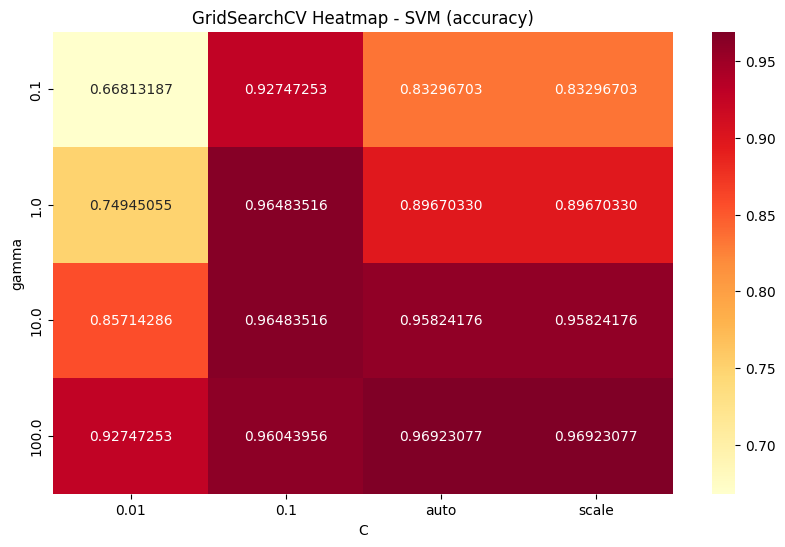

In [9]:
import seaborn as sns

linear_results = results[results["param_svm__kernel"] == "poly"].copy()

C_values = [0.1, 1, 10, 100]
gamma_values = ["scale", "auto", 0.01, 0.1]

pivot = linear_results.pivot_table(
    values="mean_test_score",
    index="param_svm__C",
    columns="param_svm__gamma",
    aggfunc="mean",
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".8f", cmap="YlOrRd")
plt.xlabel("C")
plt.ylabel("gamma")
plt.title("GridSearchCV Heatmap - SVM (accuracy)")
plt.show()